**Author**: Moch Nabil Farras Dhiya

**E-mail**: nabilfarras923@gmail.com

-------------------

**Disclaimer**: This project was made by me and my team when we attended DataPath Workshop as a hands-on project. But, soon after I made significant changes to the **Insight and Graph section**, so that that particular section are completely different (syntax, analysis, and insight) than my initial project with my team. Whilst the other section are not that different.

**Original work**: https://colab.research.google.com/drive/1UGui78q8ohQVD4cfBLtClZihhuiI9eZW#scrollTo=vTQBy542re-s

**Credit**: DataPath.ID and Group 9

# Connect to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%cd /content/gdrive/My Drive/Portfolio/Data Analysis/Python/Market Campaign Analysis/CSV

/content/gdrive/My Drive/Portfolio/Data Analysis/Python/Market Campaign Analysis/CSV


# Import Packages

In [3]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Import Data

In [4]:
df = pd.read_csv("market_campaign.csv")

# Initial EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Campaign Name                    96 non-null     object
 1   Objective                        96 non-null     object
 2   Channel                          96 non-null     object
 3   OS                               96 non-null     object
 4   Title                            96 non-null     object
 5   Message                          82 non-null     object
 6   Conversion Event                 96 non-null     object
 7   Total Sent(users)                96 non-null     object
 8   Total Clicked(users)             96 non-null     object
 9   Errors                           96 non-null     object
 10  Converting User                  96 non-null     object
 11  Total control group count        96 non-null     object
 12  Total control group conversions  96 no

In [6]:
df.head()

,Campaign Name,Objective,Channel,OS,Title,Message,Conversion Event,Total Sent(users),Total Clicked(users),Errors,Converting User,Total control group count,Total control group conversions,Error: Profile not reachable,Error: Email Dropped,Error: App uninstalled(iOS),Error: App uninstalled(Android)
0,Cara Investasi Emas Artikel,Education,Push Notification,iOS/Android,Tetap Cuan dengan Nabung Emas Online,"""Nabung emas online bukan cuma aman, tapi juga...",gold_buy_success,"43,599","1,320","8,706",211,"2,257",109,0,0,13,145
1,Perbedaan OJK dengan BAPPEBTI,Education,Push Notification,iOS/Android,Apa Bedanya OJK dengan BAPPEBTI? 😊,Kenapa BukaToko by PG Berjangka diawasi oleh B...,buy_success,"182,284","3,128","1,805",454,"9,972",443,0,0,60,"1,324"
2,Cara Investasi Bitcoin Artikel,Education,Push Notification,iOS/Android,Mau Dapat Cuan Gede dari Investasi Bitcoin? 🤑,"""Yuk, baca artikel ini dan pahami tips-tips be...",buy_success,447,20,"29,592",8,26,7,0,0,0,4
3,Hindari Investasi Emas Bodong,Education,Push Notification,iOS/Android,"""Awas, investasi emas online bodong!""",Cari tahu tips aman investasi emas online di s...,gold_buy_success,"43,430","1,309","1,193",136,"2,302",69,0,0,10,368
4,D+0 User installed but forget,Acquisition,Push Notification,iOS/Android,"""Yuk, Registrasi di BukaToko 😊""",Jangan lupa registrasi ya Sobat Cuan! Jangan s...,registration_success,"10,660",390,"25,247",58,716,45,"17,159",0,0,"1,008"


In [7]:
df.tail()

,Campaign Name,Objective,Channel,OS,Title,Message,Conversion Event,Total Sent(users),Total Clicked(users),Errors,Converting User,Total control group count,Total control group conversions,Error: Profile not reachable,Error: Email Dropped,Error: App uninstalled(iOS),Error: App uninstalled(Android)
91,Voucher for P2P Interviewee 2,Announcement,Email,Web,👋 Ada Voucher Untukmu,NaN,buy_success,1,0,0,0,0,0,0,0,0,0
92,Voucher for P2P Interviewee 3,Announcement,Email,Web,👋 Ada Voucher Untukmu,NaN,buy_success,1,0,0,0,0,0,0,0,0,0
93,Voucher for P2P Interviewee 4,Announcement,Email,Web,👋 Ada Voucher Untukmu,NaN,buy_success,1,1,0,1,0,0,0,0,0,0
94,Voucher for P2P Interviewee 5,Announcement,Email,Web,👋 Ada Voucher Untukmu,NaN,buy_success,1,0,0,0,0,0,0,0,0,0
95,Voucher for P2P Interviewee 6,Announcement,Email,Web,👋 Ada Voucher Untukmu,NaN,buy_success,1,0,0,0,0,0,0,0,0,0


In [8]:
df.sample(5)

,Campaign Name,Objective,Channel,OS,Title,Message,Conversion Event,Total Sent(users),Total Clicked(users),Errors,Converting User,Total control group count,Total control group conversions,Error: Profile not reachable,Error: Email Dropped,Error: App uninstalled(iOS),Error: App uninstalled(Android)
93,Voucher for P2P Interviewee 4,Announcement,Email,Web,👋 Ada Voucher Untukmu,NaN,buy_success,1,1,0,1,0,0,0,0,0,0
38,Alasan Investasi Reksa Dana,Education,Push Notification,iOS/Android,Yakin Gak Mau Investasi Reksa Dana? 😊,Baca artikel ini untuk paham alasan kenapa kam...,buy_success,"158,030","2,381",580,97,"8,599",30,0,0,34,546
65,DNI Reminder D+0,Acquisition,Push Notification,iOS/Android,Yakin Gak Mau Cuan dari Reksadana? 😔,Yang lain sudah pada cuan lho. Kamu kapan? Yuk...,buy_success,"2,527",578,461,438,107,77,7,0,0,6
61,ETH Reminder D+0,Acquisition,Push Notification,iOS/Android,Cuan Bersama Ethereum! 😊,"""Selesaikan transaksimu biar tambah cuan! Yuk,...",buy_success,"1,969",198,"16,472",143,156,40,3,0,0,3
27,Waktu Terbaik Transaksi Ethere,Education,Push Notification,iOS/Android,Kapan Waktu Terbaik Bagimu Transaksi ETH? 👍,Kapan Waktu Terbaik Transaksi Ethereum? Yuk Si...,buy_success,535,8,3,2,27,2,0,0,0,3


In [9]:
for col in df.columns:
  print(f"========== {col} ==========")
  print(df[col].value_counts())
  print()

========== Campaign Name ==========
Weekly Newsletter                 5
Webinar PR                        4
Webinar PR Teaser                 3
Mutual Fund Launch                2
ETH Reminder D+0                  2
                                 ..
Strategi Diversifikasi Kripto     1
Strategi Cuan Kripto bagi Pemu    1
Perbedaan OJK dengan BAPPEBTI     1
Inflasi dan S&P 500               1
Voucher for P2P Interviewee 6     1
Name: Campaign Name, Length: 75, dtype: int64

========== Objective ==========
Education       44
Acquisition     35
Announcement    14
Promo            2
Upselling        1
Name: Objective, dtype: int64

========== Channel ==========
Push Notification     78
Email                 15
InApp Notification     3
Name: Channel, dtype: int64

========== OS ==========
iOS/Android    79
Web            15
Android         1
iOS             1
Name: OS, dtype: int64

========== Title ==========
👋 Ada Voucher Untukmu                                 6
Yakin Gak Mau Cuan dari 

# Data Cleaning

Perhatikan bahwa hampir semua kolom memiliki kesalahan type data, yang seharusnya numerical (int/float), justru bertipe object (string).

In [10]:
# List the error columns
columns = [col for col in df.columns[7:] if col != "Error: App uninstalled(iOS)"]

In [11]:
# Repair process
for col in columns:
  df[col] = df[col].apply(lambda x: int(x.replace(",", "")) if "," in x else( 0 if x == "-" else int(x)))
  df[col] = df[col].astype("int")

print(df.dtypes)

Campaign Name                      object
Objective                          object
Channel                            object
OS                                 object
Title                              object
Message                            object
Conversion Event                   object
Total Sent(users)                   int64
Total Clicked(users)                int64
Errors                              int64
Converting User                     int64
Total control group count           int64
Total control group conversions     int64
Error: Profile not reachable        int64
Error: Email Dropped                int64
Error: App uninstalled(iOS)         int64
Error: App uninstalled(Android)     int64
dtype: object


# Final Cleaned Data

In [12]:
df

,Campaign Name,Objective,Channel,OS,Title,Message,Conversion Event,Total Sent(users),Total Clicked(users),Errors,Converting User,Total control group count,Total control group conversions,Error: Profile not reachable,Error: Email Dropped,Error: App uninstalled(iOS),Error: App uninstalled(Android)
0,Cara Investasi Emas Artikel,Education,Push Notification,iOS/Android,Tetap Cuan dengan Nabung Emas Online,"""Nabung emas online bukan cuma aman, tapi juga...",gold_buy_success,43599,1320,8706,211,2257,109,0,0,13,145
1,Perbedaan OJK dengan BAPPEBTI,Education,Push Notification,iOS/Android,Apa Bedanya OJK dengan BAPPEBTI? 😊,Kenapa BukaToko by PG Berjangka diawasi oleh B...,buy_success,182284,3128,1805,454,9972,443,0,0,60,1324
2,Cara Investasi Bitcoin Artikel,Education,Push Notification,iOS/Android,Mau Dapat Cuan Gede dari Investasi Bitcoin? 🤑,"""Yuk, baca artikel ini dan pahami tips-tips be...",buy_success,447,20,29592,8,26,7,0,0,0,4
3,Hindari Investasi Emas Bodong,Education,Push Notification,iOS/Android,"""Awas, investasi emas online bodong!""",Cari tahu tips aman investasi emas online di s...,gold_buy_success,43430,1309,1193,136,2302,69,0,0,10,368
4,D+0 User installed but forget,Acquisition,Push Notification,iOS/Android,"""Yuk, Registrasi di BukaToko 😊""",Jangan lupa registrasi ya Sobat Cuan! Jangan s...,registration_success,10660,390,25247,58,716,45,17159,0,0,1008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Voucher for P2P Interviewee 2,Announcement,Email,Web,👋 Ada Voucher Untukmu,NaN,buy_success,1,0,0,0,0,0,0,0,0,0
92,Voucher for P2P Interviewee 3,Announcement,Email,Web,👋 Ada Voucher Untukmu,NaN,buy_success,1,0,0,0,0,0,0,0,0,0
93,Voucher for P2P Interviewee 4,Announcement,Email,Web,👋 Ada Voucher Untukmu,NaN,buy_success,1,1,0,1,0,0,0,0,0,0
94,Voucher for P2P Interviewee 5,Announcement,Email,Web,👋 Ada Voucher Untukmu,NaN,buy_success,1,0,0,0,0,0,0,0,0,0


# Graph and Insight Section

## What is their best campaign(s) in February 2019 ?

Pertama, kami mendefinisikan variabel **Conversion Uplift** sebagai metrics yang mengindikasikan persentase peningkatan atau pengurangan pada *Conversion Rate* yang diperoleh melalui *campaign*. *Nilai Conversion Uplift* dapat diperoleh dengan menggunakan rumus berikut:

*Conversion Uplift* = $\frac{User Percentage}{CG Percentage}\times100\% - 100$


---



Kami juga mendefinisikan **'best campaign'** sebagai *campaign* dengan conversion uplift dengan nilai **Conversion Uplift positif tertinggi**, dengan mempertimbangkan nilai **Converstion Rate** *campaign*. Alasan kami menggunakan metriks ini sebagai metriks sukses kami adalah karena pada akhirnya, tujuan akhir dari suatu *campaign* adalah untuk melihat apakah terdapat perbedaan signifikan pada *conversion rate* sebelum dan setelah *campaign* diadakan. Kami **tidak** menggunakan **CTR** karena kami mendefinisikan/mengasumsikan tujuan campaign adalah untuk meningkatkan *sale* atau *lead*, sehingga *traffic* dari user **kurang relevan** pada analisis ini.

In [13]:
# Count user percentage
user_percentage = [df["Converting User"][i] / df["Total Clicked(users)"][i] * 100 for i in range(len(df))]
df["User Percentage"] = user_percentage

# Count control group percentage
cg_percentage = [df["Total control group conversions"][i] / df["Total control group count"][i] * 100 for i in range(len(df))]
df["CG Percentage"] = cg_percentage

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  


Akan dicek terlebih dahulu nilai User Percentage dan CG Percentage pada setiap campaign.

In [14]:
print(len(df.loc[df["User Percentage"].isna()]))
df.loc[df["User Percentage"].isna()]

8


,Campaign Name,Objective,Channel,OS,Title,Message,Conversion Event,Total Sent(users),Total Clicked(users),Errors,Converting User,Total control group count,Total control group conversions,Error: Profile not reachable,Error: Email Dropped,Error: App uninstalled(iOS),Error: App uninstalled(Android),User Percentage,CG Percentage
7,Welcome Message,Acquisition,Push Notification,iOS/Android,Selamat Datang Sobat Cuan! 🎉,Ayo segera registrasi untuk raih cuan pertamam...,registration_success,0,0,0,0,0,0,0,0,0,0,NaN,NaN
14,Jual Emas Batangan,Education,Push Notification,iOS/Android,Mau Jual Emas Batangan?,Ketahui dulu aturan pajak penjualan emas batan...,gold_buy_success,0,0,0,0,0,0,0,0,0,0,NaN,NaN
56,ETH Masih Worth It?,Education,Push Notification,iOS/Android,Apakah ETH Masih Worth It Dikoleksi?,"""Yuk, simak jawabannya bareng-bareng di artike...",buy_success,0,0,79128,0,0,0,0,0,0,0,NaN,NaN
90,Voucher for P2P Interviewee 1,Announcement,Email,Web,👋 Ada Voucher Untukmu,NaN,buy_success,1,0,0,0,0,0,0,0,0,0,NaN,NaN
91,Voucher for P2P Interviewee 2,Announcement,Email,Web,👋 Ada Voucher Untukmu,NaN,buy_success,1,0,0,0,0,0,0,0,0,0,NaN,NaN
92,Voucher for P2P Interviewee 3,Announcement,Email,Web,👋 Ada Voucher Untukmu,NaN,buy_success,1,0,0,0,0,0,0,0,0,0,NaN,NaN
94,Voucher for P2P Interviewee 5,Announcement,Email,Web,👋 Ada Voucher Untukmu,NaN,buy_success,1,0,0,0,0,0,0,0,0,0,NaN,NaN
95,Voucher for P2P Interviewee 6,Announcement,Email,Web,👋 Ada Voucher Untukmu,NaN,buy_success,1,0,0,0,0,0,0,0,0,0,NaN,NaN


In [15]:
print(len(df.loc[df["CG Percentage"].isna()]))
df.loc[df["CG Percentage"].isna()]

21


,Campaign Name,Objective,Channel,OS,Title,Message,Conversion Event,Total Sent(users),Total Clicked(users),Errors,Converting User,Total control group count,Total control group conversions,Error: Profile not reachable,Error: Email Dropped,Error: App uninstalled(iOS),Error: App uninstalled(Android),User Percentage,CG Percentage
7,Welcome Message,Acquisition,Push Notification,iOS/Android,Selamat Datang Sobat Cuan! 🎉,Ayo segera registrasi untuk raih cuan pertamam...,registration_success,0,0,0,0,0,0,0,0,0,0,NaN,NaN
14,Jual Emas Batangan,Education,Push Notification,iOS/Android,Mau Jual Emas Batangan?,Ketahui dulu aturan pajak penjualan emas batan...,gold_buy_success,0,0,0,0,0,0,0,0,0,0,NaN,NaN
33,Weekly Newsletter,Education,Email,Web,"""👀 Harga Emas Siap Meroket, BTC & ETH Bakal Bi...",NaN,buy_success,439000,671,63598,78,0,0,0,8102,0,0,11.624441,NaN
34,Webinar PR,Education,Push Notification,iOS/Android,Ikuti Webinarnya Sekarang! 👍,"""Mau berkesempatan mendapatkan 0,2 Gram Emas G...",buy_success,179057,2821,2464,608,0,0,0,0,78,2385,21.552641,NaN
43,Webinar PR,Education,Push Notification,iOS/Android,Ikuti Webinarnya Sekarang! 👍,"""Mau berkesempatan mendapatkan 0,2 Gram Emas G...",buy_success,181293,2176,2031,479,0,0,0,0,65,1964,22.012868,NaN
51,Weekly Newsletter,Education,Email,Web,"""📊 Optimisme Ekonomi AS Menguat, Apakah S&P 50...",NaN,buy_success,447022,392,68605,57,0,0,0,28675,0,0,14.540816,NaN
56,ETH Masih Worth It?,Education,Push Notification,iOS/Android,Apakah ETH Masih Worth It Dikoleksi?,"""Yuk, simak jawabannya bareng-bareng di artike...",buy_success,0,0,79128,0,0,0,0,0,0,0,NaN,NaN
71,Weekly Newsletter,Education,Email,Web,"""🔮 Bitcoin Diramal Kian Strong, Emas Menanti T...",NaN,buy_success,436411,614,70608,66,0,0,0,33536,0,0,10.749186,NaN
73,Usability Testing Invitation,Announcement,Email,Web,👋 Jadilah yang Pertama untuk Mencoba Wajah Bar...,NaN,buy_success,156,2,3,0,0,0,0,3,0,0,0.000000,NaN
75,Spread Error,Announcement,InApp Notification,iOS/Android,Mohon Maaf untuk Ketidaknyamanan Anda|Sorry fo...,Saat ini sedang terjadi gangguan harga spread ...,buy_success,6332,6030,0,2432,0,0,0,0,0,0,40.331675,NaN


Amati bahwa terdapat *null value* pada kolom *CG Percentage*, atau dengan kata lain tidak terdapat CG pada *campaign* tersebut. Sehingga, seluruh *campaign* tersebut tidak akan dipakai dalam analisis ini. Nilai *conversion rate* yang relatif rendah juga menjadi pertimbangan kami dalam melakukan demikian.

In [16]:
df1 = df[df['CG Percentage'].notna()]

Selain itu, kita juga ingin bahwa *campaign* yang dianalisis adalah *campaign* asli, bukan *test campaign*.

In [17]:
df1 = df1[df1["Title"] != "test"]

### Data Agg

In [18]:
# Sum of Converting User + Mean of User and CG Percentage based on Campaign Name sorted by Converting User
df_converting_user = df1.groupby(['Campaign Name', "Objective", "Channel", "OS", "Conversion Event"])[["Converting User", "User Percentage", "Total control group conversions", "CG Percentage"]].agg({"Converting User" : "sum", 
                                                                                                                                                   "Total control group conversions" : "sum",
                                                                                                                                                   "User Percentage" : "mean",
                                                                                                                                                   "CG Percentage" : "mean"})
df_converting_user["Conversion Uplift"] = df_converting_user["User Percentage"]/df_converting_user["CG Percentage"]*100 - 100
df_converting_user = df_converting_user.sort_values("Converting User", ascending=False)
df_converting_user[:10]

,,,,,Converting User,Total control group conversions,User Percentage,CG Percentage,Conversion Uplift
Campaign Name,Objective,Channel,OS,Conversion Event,,,,,
Welcome Message,Acquisition,Push Notification,iOS/Android,registration_success,3817,3870,24.349324,37.532732,-35.125096
User Complete Registration,Acquisition,Push Notification,iOS/Android,kyc_upload_success,2679,1054,30.634648,24.712778,23.962785
Webinar PR Teaser,Education,Push Notification,iOS/Android,buy_success,2664,1582,19.507967,3.639082,436.068353
Spread Error,Announcement,Push Notification,iOS/Android,buy_success,1221,375,29.635922,12.291052,141.117864
Crypto Price Update,Announcement,Push Notification,iOS/Android,buy_success,965,375,27.922454,9.040501,208.859568
Webinar PR,Education,Push Notification,iOS/Android,buy_success,938,976,17.442810,4.589930,280.023435
Gopay Promo,Promo,Push Notification,iOS/Android,gopay_top_up_success,935,219,8.628645,0.648601,1230.347978
Blibli Campaign,Promo,Push Notification,iOS/Android,buy_success,868,526,24.828375,4.628652,436.406192
Strategi Cuan Kripto bagi Pemu,Education,Push Notification,iOS/Android,buy_success,693,443,20.873494,4.686343,345.411148


In [19]:
# Sum of Converting User + Mean of User Percentage based on Campaign Name sorted by CG Conversions
df_converting_cg = df1.groupby(['Campaign Name', "Objective", "Channel", "OS", "Conversion Event"])[["Converting User", "User Percentage", "Total control group conversions", "CG Percentage"]].agg({"Converting User" : "sum", 
                                                                                                                                                   "Total control group conversions" : "sum",
                                                                                                                                                   "User Percentage" : "mean",
                                                                                                                                                   "CG Percentage" : "mean"})

df_converting_cg["Conversion Uplift"] = df_converting_cg["User Percentage"]/df_converting_cg["CG Percentage"]*100 - 100
df_converting_cg = df_converting_cg.sort_values("Total control group conversions", ascending=False)
df_converting_cg[:10]

,,,,,Converting User,Total control group conversions,User Percentage,CG Percentage,Conversion Uplift
Campaign Name,Objective,Channel,OS,Conversion Event,,,,,
Welcome Message,Acquisition,Push Notification,iOS/Android,registration_success,3817,3870,24.349324,37.532732,-35.125096
Webinar PR Teaser,Education,Push Notification,iOS/Android,buy_success,2664,1582,19.507967,3.639082,436.068353
User Complete Registration,Acquisition,Push Notification,iOS/Android,kyc_upload_success,2679,1054,30.634648,24.712778,23.962785
Webinar PR,Education,Push Notification,iOS/Android,buy_success,938,976,17.442810,4.589930,280.023435
Blibli Campaign,Promo,Push Notification,iOS/Android,buy_success,868,526,24.828375,4.628652,436.406192
Strategi Diversifikasi Kripto,Education,Push Notification,iOS/Android,buy_success,632,451,19.861722,4.805029,313.352826
Strategi Cuan Kripto bagi Pemu,Education,Push Notification,iOS/Android,buy_success,693,443,20.873494,4.686343,345.411148
Perbedaan OJK dengan BAPPEBTI,Education,Push Notification,iOS/Android,buy_success,454,443,14.514066,4.442439,226.713930
Spread Error,Announcement,Push Notification,iOS/Android,buy_success,1221,375,29.635922,12.291052,141.117864


In [20]:
# Sum of Converting User + Mean of User and CG Percentage based on Campaign Name sorted by User Percentage
df_user_percentage = df1.groupby(['Campaign Name', "Objective", "Channel", "OS", "Conversion Event"])[["Converting User", "User Percentage", "Total control group conversions", "CG Percentage"]].agg({"Converting User" : "sum", 
                                                                                                                                                   "Total control group conversions" : "sum",
                                                                                                                                                   "User Percentage" : "mean",
                                                                                                                                                   "CG Percentage" : "mean"})
df_user_percentage["Conversion Uplift"] = df_user_percentage["User Percentage"]/df_user_percentage["CG Percentage"]*100 - 100
df_user_percentage = df_user_percentage.sort_values("User Percentage", ascending=False)
df_user_percentage[:10]

,,,,,Converting User,Total control group conversions,User Percentage,CG Percentage,Conversion Uplift
Campaign Name,Objective,Channel,OS,Conversion Event,,,,,
DNI Reminder D+0,Acquisition,Push Notification,iOS/Android,buy_success,593,108,81.674584,80.267023,1.753599
DNI Reminder D+1,Acquisition,Push Notification,iOS/Android,buy_success,365,62,80.043860,80.519481,-0.590690
ETH Reminder D+0,Acquisition,Push Notification,iOS/Android,buy_success,252,74,77.714165,46.153846,68.380690
DRH Reminder D+0,Acquisition,Push Notification,iOS/Android,buy_success,333,50,77.375819,69.126984,11.932872
DRH Reminder D+1,Acquisition,Push Notification,iOS/Android,buy_success,233,31,76.644737,70.454545,8.786078
BTC Reminder D+0,Acquisition,Push Notification,iOS/Android,buy_success,127,35,61.283784,48.611111,26.069498
ETH Reminder D+1,Acquisition,Push Notification,iOS/Android,buy_success,24,13,55.813953,59.090909,-5.545617
BTC Reminder D+1,Acquisition,Push Notification,iOS/Android,buy_success,23,10,54.761905,66.666667,-17.857143
SnP Reminder D+1,Acquisition,Push Notification,iOS/Android,buy_success,2,0,50.000000,0.000000,inf


In [21]:
# Sum of Converting User + Mean of User and CG Percentage based on Campaign Name sorted by CG Percentage
df_cg_percentage = df1.groupby(['Campaign Name', "Objective", "Channel", "OS", "Conversion Event"])[["Converting User", "User Percentage", "Total control group conversions", "CG Percentage"]].agg({"Converting User" : "sum", 
                                                                                                                                                   "Total control group conversions" : "sum",
                                                                                                                                                   "User Percentage" : "mean",
                                                                                                                                                   "CG Percentage" : "mean"})
df_cg_percentage["Conversion Uplift"] = df_cg_percentage["User Percentage"]/df_cg_percentage["CG Percentage"]*100 - 100
df_cg_percentage = df_cg_percentage.sort_values("CG Percentage", ascending=False)
df_cg_percentage[:10]

,,,,,Converting User,Total control group conversions,User Percentage,CG Percentage,Conversion Uplift
Campaign Name,Objective,Channel,OS,Conversion Event,,,,,
DNI Reminder D+1,Acquisition,Push Notification,iOS/Android,buy_success,365,62,80.043860,80.519481,-0.590690
DNI Reminder D+0,Acquisition,Push Notification,iOS/Android,buy_success,593,108,81.674584,80.267023,1.753599
DRH Reminder D+1,Acquisition,Push Notification,iOS/Android,buy_success,233,31,76.644737,70.454545,8.786078
DRH Reminder D+0,Acquisition,Push Notification,iOS/Android,buy_success,333,50,77.375819,69.126984,11.932872
BTC Reminder D+1,Acquisition,Push Notification,iOS/Android,buy_success,23,10,54.761905,66.666667,-17.857143
ETH Reminder D+1,Acquisition,Push Notification,iOS/Android,buy_success,24,13,55.813953,59.090909,-5.545617
BTC Reminder D+0,Acquisition,Push Notification,iOS/Android,buy_success,127,35,61.283784,48.611111,26.069498
ETH Reminder D+0,Acquisition,Push Notification,iOS/Android,buy_success,252,74,77.714165,46.153846,68.380690
Welcome Message,Acquisition,Push Notification,iOS/Android,registration_success,3817,3870,24.349324,37.532732,-35.125096


In [22]:
# Sum of Converting User + Mean of User and CG Percentage based on Campaign Name sorted by Conversion Uplift
df_uplift_percentage = df1.groupby(['Campaign Name', "Objective", "Channel", "OS", "Conversion Event"])[["Converting User", "User Percentage", "Total control group conversions", "CG Percentage"]].agg({"Converting User" : "sum", 
                                                                                                                                                   "Total control group conversions" : "sum",
                                                                                                                                                   "User Percentage" : "mean",
                                                                                                                                                   "CG Percentage" : "mean"})
df_uplift_percentage["Conversion Uplift"] = df_uplift_percentage["User Percentage"]/df_uplift_percentage["CG Percentage"]*100 - 100

df_uplift_percentage_pos = df_uplift_percentage.loc[df_uplift_percentage["Conversion Uplift"] > 0]
df_uplift_percentage_pos = df_uplift_percentage_pos.sort_values("Conversion Uplift", ascending=False)
df_uplift_percentage_pos

,,,,,Converting User,Total control group conversions,User Percentage,CG Percentage,Conversion Uplift
Campaign Name,Objective,Channel,OS,Conversion Event,,,,,
SnP Reminder D+1,Acquisition,Push Notification,iOS/Android,buy_success,2,0,50.000000,0.000000,inf
"Activated BukaToko Cuan, less ba",Upselling,Push Notification,iOS/Android,pc_joined_success_page,268,29,10.071402,0.319489,3052.348741
Crypto Earn Launching Android,Acquisition,Push Notification,Android,pc_joined_success_page,15,1,8.771930,0.284900,2978.947368
Inflasi dan S&P 500,Education,Push Notification,iOS/Android,buy_success,46,10,1.752381,0.107193,1534.796190
Gopay Promo,Promo,Push Notification,iOS/Android,gopay_top_up_success,935,219,8.628645,0.648601,1230.347978
Mutual Fund Launching Competit,Acquisition,Push Notification,iOS/Android,buy_success,413,112,4.021030,0.341380,1077.874598
SnP Weekly Blast,Acquisition,Push Notification,iOS/Android,snp_buy_success,98,34,1.243024,0.115780,973.607007
Mutual Fund Launch,Education,Push Notification,iOS/Android,buy_success,260,64,3.707929,0.352520,951.835247
11 Sektor S&P 500,Education,Push Notification,iOS/Android,buy_success,23,8,0.726239,0.080265,804.803442


In [23]:
df_uplift_percentage_neg = df_uplift_percentage.loc[df_uplift_percentage["Conversion Uplift"] <= 0]
df_uplift_percentage_neg.sort_values("Conversion Uplift", ascending=False)
df_uplift_percentage_neg

,,,,,Converting User,Total control group conversions,User Percentage,CG Percentage,Conversion Uplift
Campaign Name,Objective,Channel,OS,Conversion Event,,,,,
21 Juta Bitcoin di Dunia,Education,Push Notification,iOS/Android,buy_success,2,16,6.666667,14.814815,-55.000000
BTC Reminder D+1,Acquisition,Push Notification,iOS/Android,buy_success,23,10,54.761905,66.666667,-17.857143
DNI Reminder D+1,Acquisition,Push Notification,iOS/Android,buy_success,365,62,80.043860,80.519481,-0.590690
ETH Reminder D+1,Acquisition,Push Notification,iOS/Android,buy_success,24,13,55.813953,59.090909,-5.545617
SnP Reminder D+0,Acquisition,Push Notification,iOS/Android,buy_success,5,2,31.250000,33.333333,-6.250000
Welcome Message,Acquisition,Push Notification,iOS/Android,registration_success,3817,3870,24.349324,37.532732,-35.125096


Berdasarkan analisis di atas, terdapat beberapa hal yang dapat disimpulkan:

1.   **Tidak** **ada** *campaign* dengan lebih dari 1 *objective*.
2.   Untuk campaign **D+0** dan **D+1** terkait bitcoin, memiliki nilai *Conversion Uplift* yang relatif rendah (menuju 0). Selain itu, terjadi penurunan nilai *Conversion Uplift* dari *campaign* **D+0** ke **D+1** untuk bitcoin yang sama. Sehingga, disimpulkan bahwa *campaign* tersebut kurang berhasil.
3.   *Campaign* **Welcome Message** dan **21 Juta Bitcoin di Dunia** juga kurang berhasil karena nilai *Conversion Uplift* negatif.

In [24]:
# df_converting_user.drop(('DNI Reminder D+0',	'Acquisition'), axis=0, inplace=True)
# df_converting_user.drop(('DNI Reminder D+1',	'Acquisition'), axis=0, inplace=True)
# df_converting_user.drop(('ETH Reminder D+1',	'Acquisition'), axis=0, inplace=True)
# df_converting_user.drop(('SnP Reminder D+0',	'Acquisition'), axis=0, inplace=True)
# df_converting_user.drop(('BTC Reminder D+0',	'Acquisition'), axis=0, inplace=True)
# df_converting_user.drop(('BTC Reminder D+1',	'Acquisition'), axis=0, inplace=True)
# df_converting_user.drop(('DRH Reminder D+0',	'Acquisition'), axis=0, inplace=True)
# df_converting_user.drop(('DRH Reminder D+1',	'Acquisition'), axis=0, inplace=True)
# df_converting_user.drop(('Gold Reminder D+0',	'Acquisition'), axis=0, inplace=True)
# df_converting_user.drop(('Gold Reminder D+1',	'Acquisition'), axis=0, inplace=True)
# df_converting_user.drop(('ETH Reminder D+0',	'Acquisition'), axis=0, inplace=True)
# df_converting_user.drop(('Welcome Message', 'Acquisition'), axis=0, inplace=True)
# df_converting_user.drop(('21 Juta Bitcoin di Dunia', 'Education'), axis=0, inplace=True)

# df_converting_cg.drop(('DNI Reminder D+0',	'Acquisition'), axis=0, inplace=True)
# df_converting_cg.drop(('DNI Reminder D+1',	'Acquisition'), axis=0, inplace=True)
# df_converting_cg.drop(('ETH Reminder D+1',	'Acquisition'), axis=0, inplace=True)
# df_converting_cg.drop(('SnP Reminder D+0',	'Acquisition'), axis=0, inplace=True)
# df_converting_cg.drop(('BTC Reminder D+0',	'Acquisition'), axis=0, inplace=True)
# df_converting_cg.drop(('BTC Reminder D+1',	'Acquisition'), axis=0, inplace=True)
# df_converting_cg.drop(('DRH Reminder D+0',	'Acquisition'), axis=0, inplace=True)
# df_converting_cg.drop(('DRH Reminder D+1',	'Acquisition'), axis=0, inplace=True)
# df_converting_cg.drop(('Gold Reminder D+0',	'Acquisition'), axis=0, inplace=True)
# df_converting_cg.drop(('Gold Reminder D+1',	'Acquisition'), axis=0, inplace=True)
# df_converting_cg.drop(('ETH Reminder D+0',	'Acquisition'), axis=0, inplace=True)
# df_converting_cg.drop(('Welcome Message', 'Acquisition'), axis=0, inplace=True)
# df_converting_cg.drop(('21 Juta Bitcoin di Dunia', 'Education'), axis=0, inplace=True)

# df_user_percentage.drop(('DNI Reminder D+0',	'Acquisition'), axis=0, inplace=True)
# df_user_percentage.drop(('DNI Reminder D+1',	'Acquisition'), axis=0, inplace=True)
# df_user_percentage.drop(('ETH Reminder D+1',	'Acquisition'), axis=0, inplace=True)
# df_user_percentage.drop(('SnP Reminder D+0',	'Acquisition'), axis=0, inplace=True)
# df_user_percentage.drop(('BTC Reminder D+0',	'Acquisition'), axis=0, inplace=True)
# df_user_percentage.drop(('BTC Reminder D+1',	'Acquisition'), axis=0, inplace=True)
# df_user_percentage.drop(('DRH Reminder D+0',	'Acquisition'), axis=0, inplace=True)
# df_user_percentage.drop(('DRH Reminder D+1',	'Acquisition'), axis=0, inplace=True)
# df_user_percentage.drop(('Gold Reminder D+0',	'Acquisition'), axis=0, inplace=True)
# df_user_percentage.drop(('Gold Reminder D+1',	'Acquisition'), axis=0, inplace=True)
# df_user_percentage.drop(('ETH Reminder D+0',	'Acquisition'), axis=0, inplace=True)
# df_user_percentage.drop(('Welcome Message', 'Acquisition'), axis=0, inplace=True)
# df_user_percentage.drop(('21 Juta Bitcoin di Dunia', 'Education'), axis=0, inplace=True)

# df_cg_percentage.drop(('DNI Reminder D+0',	'Acquisition'), axis=0, inplace=True)
# df_cg_percentage.drop(('DNI Reminder D+1',	'Acquisition'), axis=0, inplace=True)
# df_cg_percentage.drop(('ETH Reminder D+1',	'Acquisition'), axis=0, inplace=True)
# df_cg_percentage.drop(('SnP Reminder D+0',	'Acquisition'), axis=0, inplace=True)
# df_cg_percentage.drop(('BTC Reminder D+0',	'Acquisition'), axis=0, inplace=True)
# df_cg_percentage.drop(('BTC Reminder D+1',	'Acquisition'), axis=0, inplace=True)
# df_cg_percentage.drop(('DRH Reminder D+0',	'Acquisition'), axis=0, inplace=True)
# df_cg_percentage.drop(('DRH Reminder D+1',	'Acquisition'), axis=0, inplace=True)
# df_cg_percentage.drop(('Gold Reminder D+0',	'Acquisition'), axis=0, inplace=True)
# df_cg_percentage.drop(('Gold Reminder D+1',	'Acquisition'), axis=0, inplace=True)
# df_cg_percentage.drop(('ETH Reminder D+0',	'Acquisition'), axis=0, inplace=True)
# df_cg_percentage.drop(('Welcome Message', 'Acquisition'), axis=0, inplace=True)
# df_cg_percentage.drop(('21 Juta Bitcoin di Dunia', 'Education'), axis=0, inplace=True)

df_uplift_percentage_pos.drop(('SnP Reminder D+1',	'Acquisition'), axis=0, inplace=True)
df_uplift_percentage_pos.drop(('DNI Reminder D+0',	'Acquisition'), axis=0, inplace=True)
df_uplift_percentage_pos.drop(('BTC Reminder D+0',	'Acquisition'), axis=0, inplace=True)
df_uplift_percentage_pos.drop(('DRH Reminder D+0',	'Acquisition'), axis=0, inplace=True)
df_uplift_percentage_pos.drop(('DRH Reminder D+1',	'Acquisition'), axis=0, inplace=True)
df_uplift_percentage_pos.drop(('Gold Reminder D+0',	'Acquisition'), axis=0, inplace=True)
df_uplift_percentage_pos.drop(('Gold Reminder D+1',	'Acquisition'), axis=0, inplace=True)
df_uplift_percentage_pos.drop(('ETH Reminder D+0',	'Acquisition'), axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: PerformanceWarning: indexing past lexsort depth may impact performance.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
df_uplift_percentage_pos

,,,,,Converting User,Total control group conversions,User Percentage,CG Percentage,Conversion Uplift
Campaign Name,Objective,Channel,OS,Conversion Event,,,,,
"Activated BukaToko Cuan, less ba",Upselling,Push Notification,iOS/Android,pc_joined_success_page,268,29,10.071402,0.319489,3052.348741
Crypto Earn Launching Android,Acquisition,Push Notification,Android,pc_joined_success_page,15,1,8.771930,0.284900,2978.947368
Inflasi dan S&P 500,Education,Push Notification,iOS/Android,buy_success,46,10,1.752381,0.107193,1534.796190
Gopay Promo,Promo,Push Notification,iOS/Android,gopay_top_up_success,935,219,8.628645,0.648601,1230.347978
Mutual Fund Launching Competit,Acquisition,Push Notification,iOS/Android,buy_success,413,112,4.021030,0.341380,1077.874598
SnP Weekly Blast,Acquisition,Push Notification,iOS/Android,snp_buy_success,98,34,1.243024,0.115780,973.607007
Mutual Fund Launch,Education,Push Notification,iOS/Android,buy_success,260,64,3.707929,0.352520,951.835247
11 Sektor S&P 500,Education,Push Notification,iOS/Android,buy_success,23,8,0.726239,0.080265,804.803442
Gold Weekly Blast,Acquisition,Push Notification,iOS/Android,gold_buy_success,422,194,7.059217,0.980937,619.639882


### Plotting

In [26]:
# Function to add value labels
def addlabels(x,y,z):
  for i in range(len(x)):
    plt.text(i, z[i], y[i], ha = "center")

In [27]:
plt.style.use('seaborn')

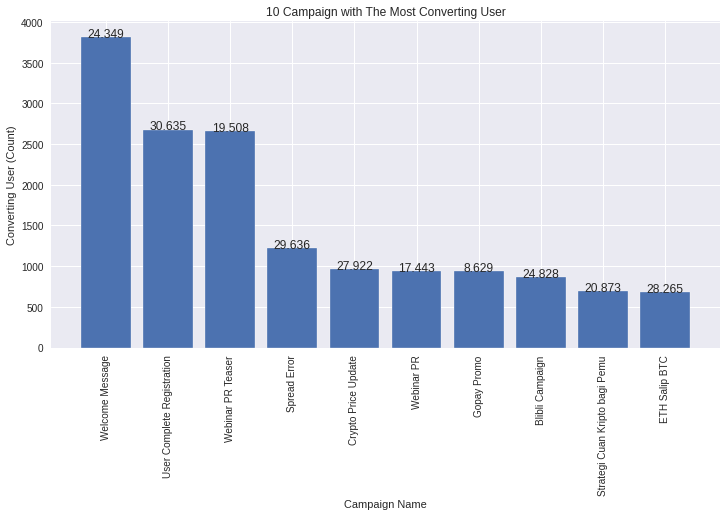

In [28]:
# List the title
title_1 = [item[0] for item in df_converting_user[:10].index]

# Visualize the data
fig, ax = plt.subplots(figsize = (12,6))
ax.bar(title_1, df_converting_user["Converting User"][:10])
ax.set_title("10 Campaign with The Most Converting User")
addlabels(title_1, round(df_converting_user["User Percentage"][:10],3), df_converting_user["Converting User"][:10])
ax.set_xlabel("Campaign Name")
ax.set_xticklabels(title_1, rotation=90)
ax.set_ylabel("Converting User (Count)")
plt.show()

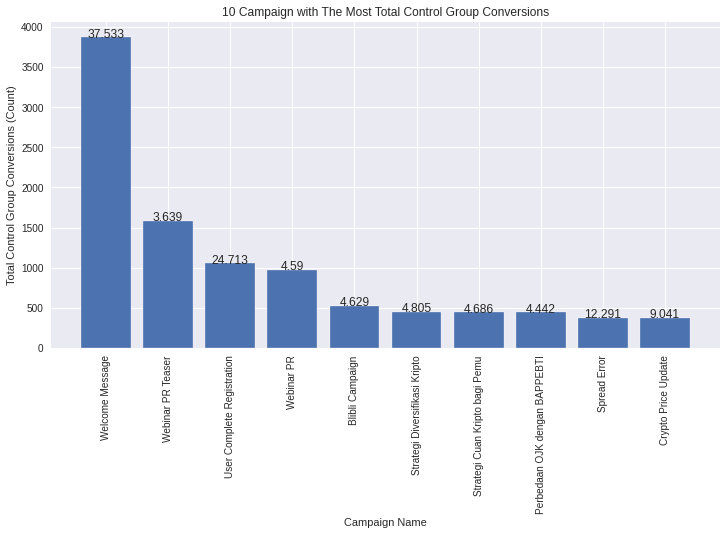

In [29]:
# List the title
title_2 = [item[0] for item in df_converting_cg[:10].index]

# Visualize the data
fig, ax = plt.subplots(figsize = (12,6))
ax.bar(title_2, df_converting_cg["Total control group conversions"][:10])
ax.set_title("10 Campaign with The Most Total Control Group Conversions")
addlabels(title_2, round(df_converting_cg["CG Percentage"][:10],3), df_converting_cg["Total control group conversions"][:10])
ax.set_xlabel("Campaign Name")
ax.set_xticklabels(title_2, rotation=90)
ax.set_ylabel("Total Control Group Conversions (Count)")
plt.show()

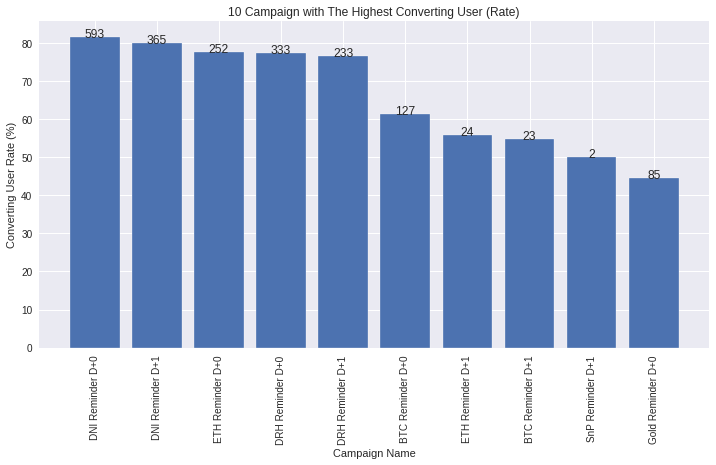

In [30]:
# List the title
title_3 = [item[0] for item in df_user_percentage[:10].index]

# Visualize the data
fig, ax = plt.subplots(figsize = (12,6))
ax.bar(title_3, df_user_percentage["User Percentage"][:10])
ax.set_title("10 Campaign with The Highest Converting User (Rate)")
addlabels(title_3, df_user_percentage["Converting User"][:10], df_user_percentage["User Percentage"][:10])
ax.set_xlabel("Campaign Name")
ax.set_xticklabels(title_3, rotation=90)
ax.set_ylabel("Converting User Rate (%)")
plt.yscale("linear")
plt.show()

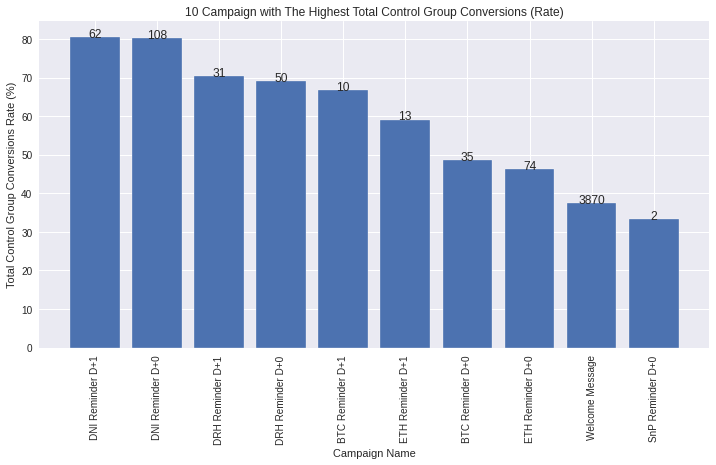

In [31]:
# List the title
title_4 = [item[0] for item in df_cg_percentage[:10].index]

# Visualize the data
fig, ax = plt.subplots(figsize = (12,6))
ax.bar(title_4, df_cg_percentage["CG Percentage"][:10])
ax.set_title("10 Campaign with The Highest Total Control Group Conversions (Rate)")
addlabels(title_4, df_cg_percentage["Total control group conversions"][:10], df_cg_percentage["CG Percentage"][:10])
ax.set_xlabel("Campaign Name")
ax.set_xticklabels(title_4, rotation=90)
ax.set_ylabel("Total Control Group Conversions Rate (%)")
plt.yscale("linear")
plt.show()

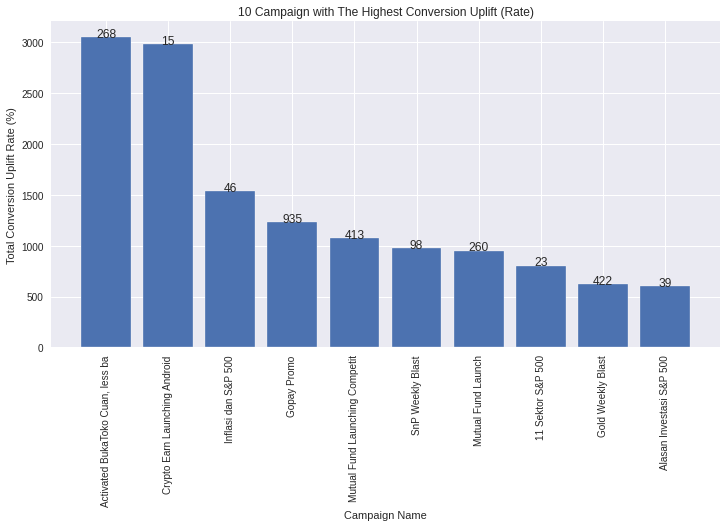

In [32]:
# List the title
title_5 = [item[0] for item in df_uplift_percentage_pos[:10].index]

# Visualize the data
fig, ax = plt.subplots(figsize = (12,6))
ax.bar(title_5, df_uplift_percentage_pos["Conversion Uplift"][:10])
ax.set_title("10 Campaign with The Highest Conversion Uplift (Rate)")
addlabels(title_5, df_uplift_percentage_pos["Converting User"][:10], df_uplift_percentage_pos["Conversion Uplift"][:10])
ax.set_xlabel("Campaign Name")
ax.set_xticklabels(title_5, rotation=90)
ax.set_ylabel("Total Conversion Uplift Rate (%)")
plt.yscale("linear")
plt.show()

**Kesimpulan**
$$$$
Menggunakan metriks kesuksesan yang telah didefinisikan sebelumnya, maka berdasarkan grafik tersebut, dapat disimpulkan bahwa campaign terbaik pada bulan Februari 2019 adalah:

1. **Activated BukaToko Cuan, less ba**
2. **BukaToko Cuan Launch**
3. **Gopay Promo**
4. **Mutual Fund Launch Campaign**
5. **Open Early Launching Android** dan **Inflasi dan S&P 500**. Kedua *Campaign* ini ditempatkan pada urutan ke-5 karena meskipun berdasarkan grafik, diperoleh bahwa *Conversion Uplift* keduanya berada pada Top 3, namun jumlah *Converting User* pada kedua *campaign* tersebut terbilang sedikit, yakni < 50 orang.

## What is the best campaign objective, channel, OS, conversion event ?

### Objective

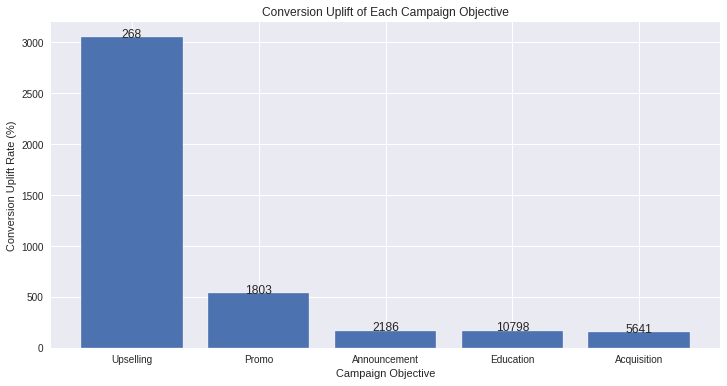

In [33]:
df_objective = df_uplift_percentage_pos.groupby("Objective")[["Converting User", "User Percentage", "Total control group conversions", "CG Percentage"]].agg({"Converting User" : "sum", 
                                                                                                                                         "Total control group conversions" : "sum",
                                                                                                                                         "User Percentage" : "mean",
                                                                                                                                         "CG Percentage" : "mean"})
df_objective["Conversion Uplift"] = df_objective["User Percentage"]/df_objective["CG Percentage"]*100 - 100
df_objective = df_objective.sort_values("Conversion Uplift", ascending=False)

# List the title
title_6 = [item for item in df_objective.index]

# Visualize the data
fig, ax = plt.subplots(figsize = (12,6))
ax.bar(title_6, df_objective["Conversion Uplift"])
ax.set_title("Conversion Uplift of Each Campaign Objective")
addlabels(title_6, round(df_objective["Converting User"], 3), df_objective["Conversion Uplift"])
ax.set_xlabel("Campaign Objective")
ax.set_ylabel("Conversion Uplift Rate (%)")
plt.yscale("linear")
plt.show()

In [34]:
df_objective

,Converting User,Total control group conversions,User Percentage,CG Percentage,Conversion Uplift
Objective,,,,,
Upselling,268,29,10.071402,0.319489,3052.348741
Promo,1803,745,16.728510,2.638626,533.985592
Announcement,2186,750,28.779188,10.665777,169.827399
Education,10798,6954,16.424811,6.122652,168.263008
Acquisition,5641,2546,14.056944,5.497086,155.716276


**Kesimpulan**

---
Berdasarkan analisis dari grafik dan tabel di atas, dapat disimpulkan bahwa *campaign* **Objective** terbaik pada bulan Februari 2019 adalah:

1. **Promo**
2. **Education**
3. **Announcement**

Hal tersebut berarti *campaign* dengan *objective* demikian cenderung sudah menemukan pasar yang tepat dan *campaign* dengan *objective* demikian dapat dikatakan berhasil (meski mungkin tidak semuanya, seperti yang telah dianalisis pada bagian sebelumnya).

**Note**: Meskipun **Upselling** merupakan campaign objective dengan *Conversion Uplift* tertinggi, namun dapat diamati bahwa hanya terdapat 1 *campaign* dengan *objective* demikian, sehingga perlu data lebih banyak sebelum dapat mengatakan bahwa *objective* tersebut adalah yang paling sukses.

### Channel

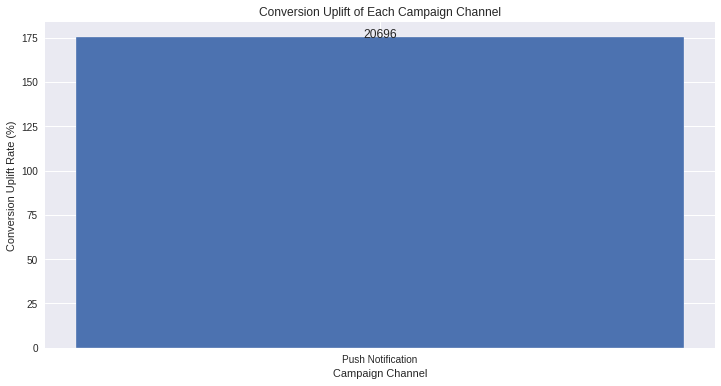

In [35]:
df_channel = df_uplift_percentage_pos.groupby("Channel")[["Converting User", "User Percentage", "Total control group conversions", "CG Percentage"]].agg({"Converting User" : "sum", 
                                                                                                                                         "Total control group conversions" : "sum",
                                                                                                                                         "User Percentage" : "mean",
                                                                                                                                         "CG Percentage" : "mean"})
df_channel["Conversion Uplift"] = df_channel["User Percentage"]/df_channel["CG Percentage"]*100 - 100
df_channel = df_channel.sort_values("Conversion Uplift", ascending=False)

# List the title
title_7 = [item for item in df_channel.index]

# Visualize the data
fig, ax = plt.subplots(figsize = (12,6))
ax.bar(title_7, df_channel["Conversion Uplift"])
ax.set_title("Conversion Uplift of Each Campaign Channel")
addlabels(title_7, round(df_channel["Converting User"], 3), df_channel["Conversion Uplift"])
ax.set_xlabel("Campaign Channel")
ax.set_ylabel("Conversion Uplift Rate (%)")
plt.yscale("linear")
plt.show()

In [36]:
df_channel

,Converting User,Total control group conversions,User Percentage,CG Percentage,Conversion Uplift
Channel,,,,,
Push Notification,20696,11024,16.122952,5.85791,175.233862


Hanya terdapat 1 *channel* pada grafik tersebut. Padahal, sebelumnya kita melihat *campaign* dengan *channel* lain. Sehingga, akan dicek.

In [37]:
df["Channel"].unique()

array(['Push Notification', 'InApp Notification', 'Email'], dtype=object)

Amati bahwa apabila digunakan definisi terdapat 2 *channel* yang hilang setelah melakukan ***filter*** oleh **metriks kesuksesan** dan ***test campaign***.

In [38]:
df.loc[df["Channel"] == "Email"]

,Campaign Name,Objective,Channel,OS,Title,Message,Conversion Event,Total Sent(users),Total Clicked(users),Errors,Converting User,Total control group count,Total control group conversions,Error: Profile not reachable,Error: Email Dropped,Error: App uninstalled(iOS),Error: App uninstalled(Android),User Percentage,CG Percentage
33,Weekly Newsletter,Education,Email,Web,"""👀 Harga Emas Siap Meroket, BTC & ETH Bakal Bi...",NaN,buy_success,439000,671,63598,78,0,0,0,8102,0,0,11.624441,NaN
51,Weekly Newsletter,Education,Email,Web,"""📊 Optimisme Ekonomi AS Menguat, Apakah S&P 50...",NaN,buy_success,447022,392,68605,57,0,0,0,28675,0,0,14.540816,NaN
71,Weekly Newsletter,Education,Email,Web,"""🔮 Bitcoin Diramal Kian Strong, Emas Menanti T...",NaN,buy_success,436411,614,70608,66,0,0,0,33536,0,0,10.749186,NaN
73,Usability Testing Invitation,Announcement,Email,Web,👋 Jadilah yang Pertama untuk Mencoba Wajah Bar...,NaN,buy_success,156,2,3,0,0,0,0,3,0,0,0.000000,NaN
77,Usability Testing Invitation 2,Announcement,Email,Web,👋 Jadilah yang Pertama untuk Mencoba Wajah Bar...,NaN,buy_success,250,15,4,6,0,0,0,4,0,0,40.000000,NaN
79,Weekly Newsletter,Education,Email,Web,"""🏃 Wall Street, Emas, dan Bitcoin Bersiap Lepa...",NaN,buy_success,476587,561,77290,84,0,0,0,34889,0,0,14.973262,NaN
80,P2P Survey,Announcement,Email,Web,"""👋 Bantu BukaToko Menjadi Lebih Baik dan Raih ...",NaN,buy_success,475,36,3,13,0,0,0,1,0,0,36.111111,NaN
82,P2P Survey,Announcement,Email,Web,"""👋 Bantu BukaToko Menjadi Lebih Baik dan Raih ...",NaN,buy_success,956,69,7,27,0,0,0,3,0,0,39.130435,NaN
89,Weekly Newsletter,Education,Email,Web,"""📈 Indeks Saham AS Cetak Rekor, Bitcoin Siap L...",N/A|N/A,buy_success,496535,444,81335,75,0,0,0,35761,0,0,16.891892,NaN
90,Voucher for P2P Interviewee 1,Announcement,Email,Web,👋 Ada Voucher Untukmu,NaN,buy_success,1,0,0,0,0,0,0,0,0,0,NaN,NaN


In [39]:
df.loc[df["Channel"] == "InApp Notification"]

,Campaign Name,Objective,Channel,OS,Title,Message,Conversion Event,Total Sent(users),Total Clicked(users),Errors,Converting User,Total control group count,Total control group conversions,Error: Profile not reachable,Error: Email Dropped,Error: App uninstalled(iOS),Error: App uninstalled(Android),User Percentage,CG Percentage
25,BukaToko Cuan Launch,Announcement,InApp Notification,iOS/Android,test,perhatian,pc_joined_success_page,187904,31829,0,794,183619,324,0,0,0,0,2.494580,0.176452
35,Mutual Fund Launch,Education,InApp Notification,iOS/Android,test,perhatian,buy_success,123931,22409,0,333,189729,162,0,0,0,0,1.486010,0.085385
75,Spread Error,Announcement,InApp Notification,iOS/Android,Mohon Maaf untuk Ketidaknyamanan Anda|Sorry fo...,Saat ini sedang terjadi gangguan harga spread ...,buy_success,6332,6030,0,2432,0,0,0,0,0,0,40.331675,NaN


Jadi, *campaign* dengan *channel* ***email*** ter-*filter* oleh **metriks kesuksesan** yang sebelumnya didefinisikan. Namun, kita perlu tahu bagaimana performa dari *campaign* dengan *channel email* tersebut, sehingga akan digunakan metriks baru **khusus untuk kasus ini**, yakni hanya dengan melihat *conversion rate*-nya. Sedangkan untuk *channel* ***InApp Notification***, **tidak** perlu diuji.

In [40]:
df_email_push = df.loc[(df["Channel"] == "Email") | (df["Channel"] == "Push Notification")]
df_email_push = df_email_push.groupby('Channel')[["Converting User", "User Percentage", "Total control group conversions", "CG Percentage"]].agg({"Converting User" : "sum", 
                                                                                                                                         "Total control group conversions" : "sum",
                                                                                                                                         "User Percentage" : "mean",
                                                                                                                                         "CG Percentage" : "mean"})
df_email_push

,Converting User,Total control group conversions,User Percentage,CG Percentage
Channel,,,,
Email,407,0,28.402114,NaN
Push Notification,27667,15321,26.665742,16.999158


**Kesimpulan**

---
Berdasarkan analisis di atas, disimpulkan bahwa **Push Notification** merupakan *channel* **terbaik** dalam melakukan *campaign*. Sebaiknya, *campaign* di masa mendatang menggunakan *approach* ini agar lebih berpotensi untuk sukses (berdasarkan definisi metriks yang digunakan di sini).

### OS

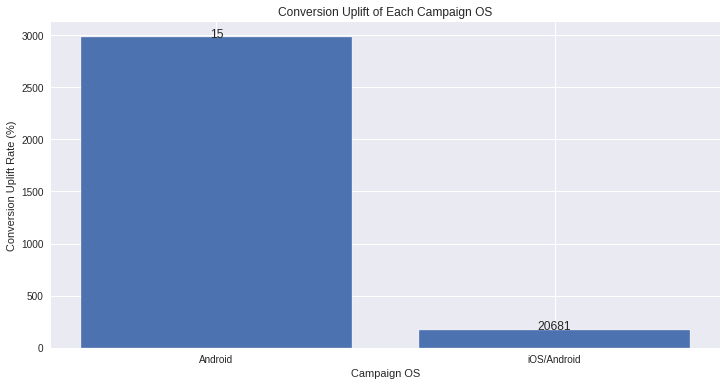

In [41]:
df_os = df_uplift_percentage_pos.groupby("OS")[["Converting User", "User Percentage", "Total control group conversions", "CG Percentage"]].agg({"Converting User" : "sum", 
                                                                                                                           "Total control group conversions" : "sum",
                                                                                                                           "User Percentage" : "mean",
                                                                                                                           "CG Percentage" : "mean"})
df_os["Conversion Uplift"] = df_os["User Percentage"]/df_os["CG Percentage"]*100 - 100
df_os = df_os.sort_values("Conversion Uplift", ascending=False)

# List the title
title_8 = [item for item in df_os.index]

# Visualize the data
fig, ax = plt.subplots(figsize = (12,6))
ax.bar(title_8, df_os["Conversion Uplift"])
ax.set_title("Conversion Uplift of Each Campaign OS")
addlabels(title_8, round(df_os["Converting User"], 3), df_os["Conversion Uplift"])
ax.set_xlabel("Campaign OS")
ax.set_ylabel("Conversion Uplift Rate (%)")
plt.yscale("linear")
plt.show()

In [42]:
df_os

,Converting User,Total control group conversions,User Percentage,CG Percentage,Conversion Uplift
OS,,,,,
Android,15,1,8.771930,0.284900,2978.947368
iOS/Android,20681,11023,16.282756,5.979062,172.329602


Berdasarkan analisis pada *channel email*, maka kita dapat **mencurigai** bahwa terdapat *OS* jenis lain (yang berkorespondensi dengan *channel email*). Akan dicek kecurigaan tersebut.

In [43]:
df["OS"].unique()

array(['iOS/Android', 'Android', 'iOS', 'Web'], dtype=object)

In [44]:
df.loc[df["OS"] != "iOS/Android"]

,Campaign Name,Objective,Channel,OS,Title,Message,Conversion Event,Total Sent(users),Total Clicked(users),Errors,Converting User,Total control group count,Total control group conversions,Error: Profile not reachable,Error: Email Dropped,Error: App uninstalled(iOS),Error: App uninstalled(Android),User Percentage,CG Percentage
23,Crypto Earn Launching Android,Acquisition,Push Notification,Android,"""Penghasilan Tambahan dari Aset Kripto, Memang...","""Bisa banget, sekarang ada Crypto Earn di Buka...",pc_joined_success_page,5967,171,75,15,351,1,0,0,0,48,8.771930,0.2849
24,Crypto Earn Launching IOS,Acquisition,Push Notification,iOS,"""Penghasilan Tambahan dari Aset Kripto, Memang...","""Bisa banget, sekarang ada Crypto Earn di Buka...",pc_joined_success_page,1451,17,25,0,80,0,0,0,6,0,0.000000,0.0000
33,Weekly Newsletter,Education,Email,Web,"""👀 Harga Emas Siap Meroket, BTC & ETH Bakal Bi...",NaN,buy_success,439000,671,63598,78,0,0,0,8102,0,0,11.624441,NaN
51,Weekly Newsletter,Education,Email,Web,"""📊 Optimisme Ekonomi AS Menguat, Apakah S&P 50...",NaN,buy_success,447022,392,68605,57,0,0,0,28675,0,0,14.540816,NaN
71,Weekly Newsletter,Education,Email,Web,"""🔮 Bitcoin Diramal Kian Strong, Emas Menanti T...",NaN,buy_success,436411,614,70608,66,0,0,0,33536,0,0,10.749186,NaN
73,Usability Testing Invitation,Announcement,Email,Web,👋 Jadilah yang Pertama untuk Mencoba Wajah Bar...,NaN,buy_success,156,2,3,0,0,0,0,3,0,0,0.000000,NaN
77,Usability Testing Invitation 2,Announcement,Email,Web,👋 Jadilah yang Pertama untuk Mencoba Wajah Bar...,NaN,buy_success,250,15,4,6,0,0,0,4,0,0,40.000000,NaN
79,Weekly Newsletter,Education,Email,Web,"""🏃 Wall Street, Emas, dan Bitcoin Bersiap Lepa...",NaN,buy_success,476587,561,77290,84,0,0,0,34889,0,0,14.973262,NaN
80,P2P Survey,Announcement,Email,Web,"""👋 Bantu BukaToko Menjadi Lebih Baik dan Raih ...",NaN,buy_success,475,36,3,13,0,0,0,1,0,0,36.111111,NaN
82,P2P Survey,Announcement,Email,Web,"""👋 Bantu BukaToko Menjadi Lebih Baik dan Raih ...",NaN,buy_success,956,69,7,27,0,0,0,3,0,0,39.130435,NaN


In [45]:
df_web_ios_android = df.loc[(df["OS"] == "Web") | (df["OS"] == "iOS/Android")]
df_web_ios_android = df_web_ios_android.groupby('OS')[["Converting User", "User Percentage", "Total control group conversions", "CG Percentage"]].agg({"Converting User" : "sum", 
                                                                                                                                         "Total control group conversions" : "sum",
                                                                                                                                         "User Percentage" : "mean",
                                                                                                                                         "CG Percentage" : "mean"})
df_web_ios_android

,Converting User,Total control group conversions,User Percentage,CG Percentage
OS,,,,
Web,407,0,28.402114,NaN
iOS/Android,31211,15806,26.782513,16.998842


**Kesimpulan**

---
Berdasarkan analisis di atas, disimpulkan bahwa **iOS/Android** merupakan *OS* **terbaik** dalam melakukan *campaign*. Sebaiknya, *campaign* yang akan dilakukan di masa mendatang menggunakan iOS/Android sebagai *OS*-nya. Hasil tersebut **sejalan** dengan hasil yang didapat pada ***section Channel***.

### Conversion Event

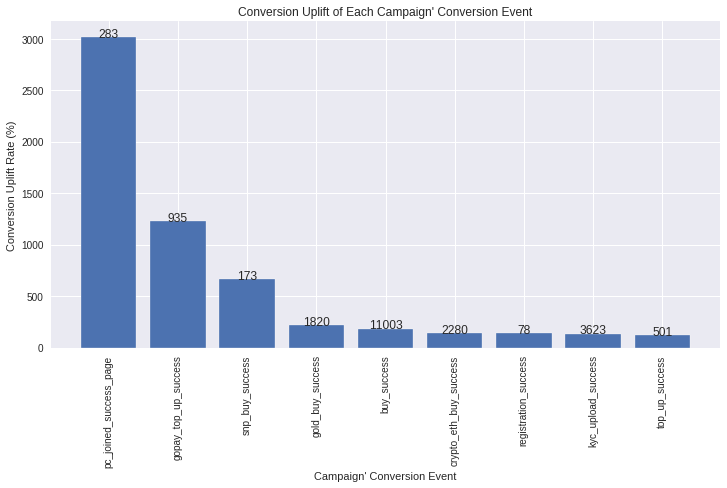

In [46]:
df_event = df_uplift_percentage_pos.groupby("Conversion Event")[["Converting User", "User Percentage", "Total control group conversions", "CG Percentage"]].agg({"Converting User" : "sum", 
                                                                                                                                         "Total control group conversions" : "sum",
                                                                                                                                         "User Percentage" : "mean",
                                                                                                                                         "CG Percentage" : "mean"})
df_event["Conversion Uplift"] = df_event["User Percentage"]/df_event["CG Percentage"]*100 - 100
df_event = df_event.sort_values("Conversion Uplift", ascending=False)

# List the title
title_9 = [item for item in df_event.index]

# Visualize the data
fig, ax = plt.subplots(figsize = (12,6))
ax.bar(title_9, df_event["Conversion Uplift"])
ax.set_title("Conversion Uplift of Each Campaign' Conversion Event")
addlabels(title_9, round(df_event["Converting User"], 3), df_event["Conversion Uplift"])
ax.set_xticklabels(title_9, rotation=90)
ax.set_xlabel("Campaign' Conversion Event")
ax.set_ylabel("Conversion Uplift Rate (%)")
plt.yscale("linear")
plt.show()

In [47]:
df_event

,Converting User,Total control group conversions,User Percentage,CG Percentage,Conversion Uplift
Conversion Event,,,,,
pc_joined_success_page,283,30,9.421666,0.302195,3017.748395
gopay_top_up_success,935,219,8.628645,0.648601,1230.347978
snp_buy_success,173,89,1.149220,0.150929,661.430758
gold_buy_success,1820,849,10.760610,3.411221,215.447476
buy_success,11003,6488,18.011283,6.334301,184.345237
crypto_eth_buy_success,2280,1379,25.354262,10.506250,141.325519
registration_success,78,65,12.087060,5.018631,140.843786
kyc_upload_success,3623,1672,18.762785,7.968830,135.452173
top_up_success,501,233,27.787022,12.669929,119.314733


**Kesimpulan**

---
Menggunakan metriks kesuksesan yang telah didefinisikan sebelumnya, maka berdasarkan grafik tersebut, dapat disimpulkan bahwa campaign terbaik pada bulan Februari 2019 adalah:

1. **gopay_top_up_success**
2. **gold_buy_success**
3. **buy_success**
4. **crypto_eth_buy_success**
5. **pc_joined_success_page** dan **snp_buy_success**. Kedua *Campaign* ini ditempatkan pada urutan ke-5 karena diamati bahwa meski *Conversion Uplift* keduanya berada pada Top 3, namun jumlah ***Converting User*** pada kedua *campaign* tersebut terbilang **sedikit** jika dibandingkan dengan *campaign* lainnya..

## What is the types of error that mostly happen to the user ?

### Total

In [48]:
# DataFrame Total
df_error_total = df.groupby(["Channel", "OS", "Conversion Event"])[["Errors"]].sum().sort_values("Errors", ascending = False)
df_error_total

Errors
Channel            OS          Conversion Event              
Email              Web         buy_success             361453
Push Notification  iOS/Android buy_success             245433
                               registration_success     56504
                               kyc_upload_success       33218
                               gold_buy_success         16797
                               snp_buy_success           7579
                               gopay_top_up_success      4791
                               crypto_eth_buy_success    4050
                               top_up_success            2542
                               pc_joined_success_page     406
                   Android     pc_joined_success_page      75
                   iOS         pc_joined_success_page      25
InApp Notification iOS/Android buy_success                  0
                               pc_joined_success_page       0

In [49]:
df_error_total = df.groupby(["Channel", "OS", "Conversion Event"])[["Errors"]].sum().sort_values("Errors", ascending = False)
drive.mount('/content/drive')
path = '/content/drive/My Drive/data total error 1.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  df_error_total.to_csv(f)

Mounted at /content/drive


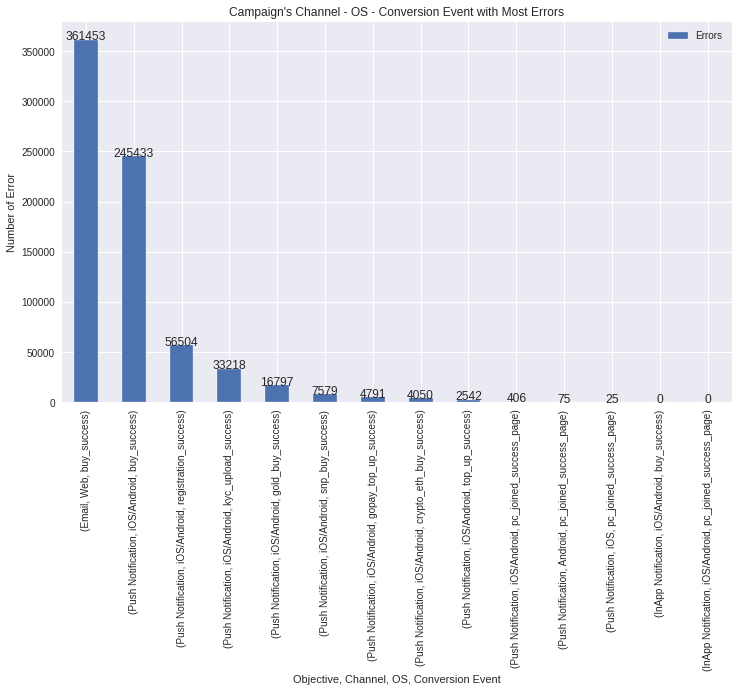

In [50]:
# Visualization
df.groupby(["Channel", "OS", "Conversion Event"])[["Errors"]].sum().sort_values("Errors", ascending  = False).plot(kind='bar',
                                                                                        figsize=(12,7),
                                                                                        legend = "Errors")
plt.title("Campaign's Channel - OS - Conversion Event with Most Errors")
addlabels(df_error_total.index, df_error_total["Errors"], df_error_total["Errors"])
plt.ylabel("Number of Error")
plt.xlabel("Objective, Channel, OS, Conversion Event")
plt.show()

In [51]:
data_error = df.groupby(["Channel", "OS", "Conversion Event"])[["Errors"]].sum().sort_values("Errors", ascending  = False)
drive.mount('/content/drive')
path = '/content/drive/My Drive/data error.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  data_error.to_csv(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Kesimpulan**

---

Berdasarkan analisis dari **Objective, Channel, OS, Conversion Event**, mayoritas Error terjadi pada

1. Channel **Email** - OS **Web** - Conversion Event **buy_success**
2. Channel **Push Notification** - OS **iOS/Android** - Conversion Event **buy_success**
3. Channel **Push Notification** - OS **iOS/Android** - Conversion Event **buy_success**

Hal tersebut berarti Campaign dengan Objective Education sebaiknya tidak dipromosikan melalui Channel Email dan OS Web karena berpotensi menimbulkan banyak error dan membuat pengguna menjadi tidak tertarik kepada Campaign tersebut.

Selain itu, diamati pula bahwa **test campaign** yang menggunakan Channel InApp Notification **tidak terjadi error** apapun. Sehingga, campaign di masa mendatang sebaiknya mengikuti prosedur/approach yang dilakukan oleh test campaign untuk meminimalisasi kemungkinan terjadinya error oleh pihak internal.

### Types of Error

In [52]:
# DataFrame Types of Error
df_error_types = df.groupby(["Channel", "OS", "Conversion Event"])[["Errors",
                                                                                 "Error: Profile not reachable", 
                                                                                 "Error: Email Dropped", 
                                                                                 "Error: App uninstalled(iOS)", 
                                                                                 "Error: App uninstalled(Android)"]].sum().sort_values("Errors", ascending = False)
df_error_types

Errors  \
Channel            OS          Conversion Event                 
Email              Web         buy_success             361453   
Push Notification  iOS/Android buy_success             245433   
                               registration_success     56504   
                               kyc_upload_success       33218   
                               gold_buy_success         16797   
                               snp_buy_success           7579   
                               gopay_top_up_success      4791   
                               crypto_eth_buy_success    4050   
                               top_up_success            2542   
                               pc_joined_success_page     406   
                   Android     pc_joined_success_page      75   
                   iOS         pc_joined_success_page      25   
InApp Notification iOS/Android buy_success                  0   
                               pc_joined_success_page       0   

                                                       Error: Profile not reachable  \
Channel            OS          Conversion Event                                       
Email              Web         buy_success                                        0   
Push Notification  iOS/Android buy_success                                       56   
                               registration_success                           34411   
                               kyc_upload_success                              6159   
                               gold_buy_success                                   0   
                               snp_buy_success                                    0   
                               gopay_top_up_success                               0   
                               crypto_eth_buy_success                             0   
                               top_up_success                                    28   
                               pc_joined_success_page                             0   
                   Android     pc_joined_success_page                             0   
                   iOS         pc_joined_success_page                             0   
InApp Notification iOS/Android buy_success                                        0   
                               pc_joined_success_page                             0   

                                                       Error: Email Dropped  \
Channel            OS          Conversion Event                               
Email              Web         buy_success                           140974   
Push Notification  iOS/Android buy_success                                0   
                               registration_success                       0   
                               kyc_upload_success                         0   
                               gold_buy_success                           0   
                               snp_buy_success                            0   
                               gopay_top_up_success                       0   
                               crypto_eth_buy_success                     0   
                               top_up_success                             0   
                               pc_joined_success_page                     0   
                   Android     pc_joined_success_page                     0   
                   iOS         pc_joined_success_page                     0   
InApp Notification iOS/Android buy_success                                0   
                               pc_joined_success_page                     0   

                                                       Error: App uninstalled(iOS)  \
Channel            OS          Conversion Event                                      
Email              Web         buy_success                                       0   
Push Notification  iOS/Android buy_success                                    1545   
            

In [53]:
path = '/content/drive/My Drive/data error types.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  df_error_types.to_csv(f)

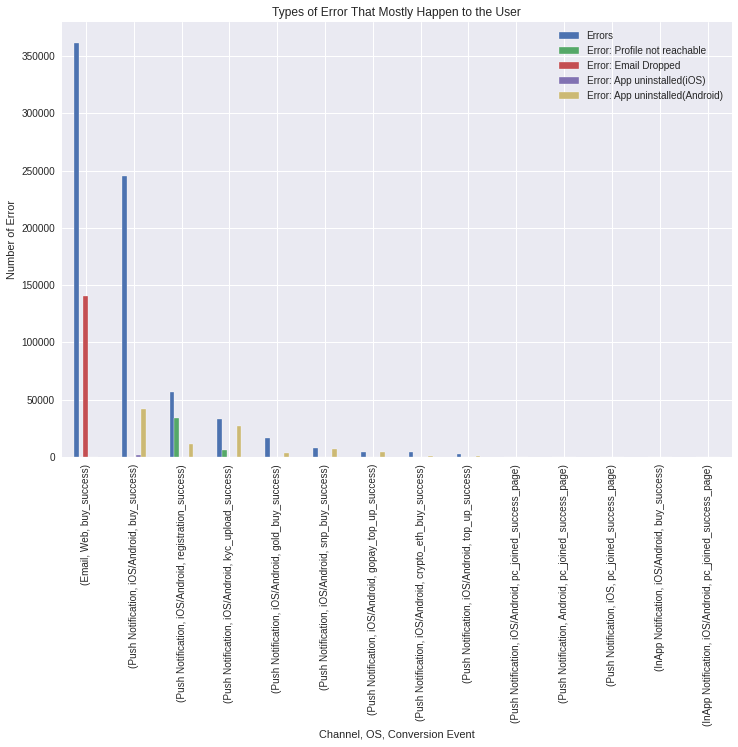

In [54]:
# Visualization
df_error_types.plot(kind = "bar", figsize = (12,8))

plt.title('Types of Error That Mostly Happen to the User')
plt.ylabel("Number of Error")
plt.xlabel("Channel, OS, Conversion Event")
plt.legend(loc="best")
plt.show()

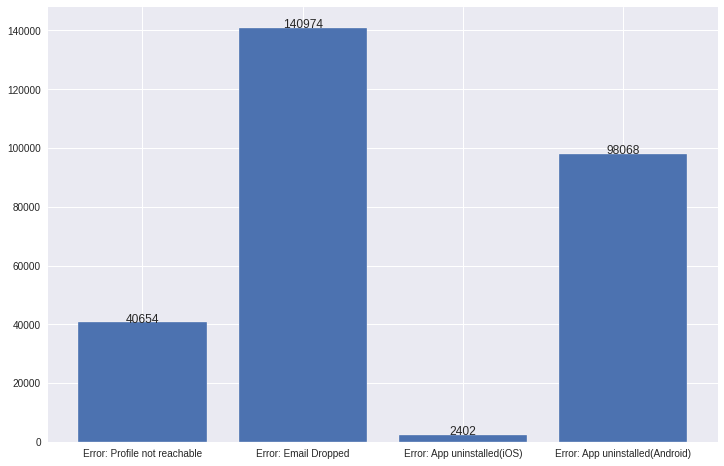

In [55]:
profile = df["Error: Profile not reachable"].sum()
email = df["Error: Email Dropped"].sum()
uninstalled_ios = df["Error: App uninstalled(iOS)"].sum()
uninstalled_android = df["Error: App uninstalled(Android)"].sum()

error_list = ["Error: Profile not reachable", "Error: Email Dropped", "Error: App uninstalled(iOS)", "Error: App uninstalled(Android)"]

ax, fig = plt.subplots(figsize = (12,8))
ax = plt.bar(x = error_list, height = [profile, email, uninstalled_ios, uninstalled_android])
addlabels(error_list, [profile, email, uninstalled_ios, uninstalled_android], [profile, email, uninstalled_ios, uninstalled_android])

**Kesimpulan**

---
Berdasarkan analisis dari seluruh jenis *Types of Error* yang muncul pada setiap Campaign, *Types of Error* yang paling sering muncul pada user yaitu:

1. **Error: Email Dropped** merupakan tipe error yang terjadi pada Campaign dengan kombinasi Channel **Email** - OS **Web** - Conversion Event **buy_success**. Hal tersebut menunjukkan bahwa meskipun Campaign dengan Channel "Email" memiliki converting rate yang cukup tinggi untuk User, namun hal tersebut sedikit berisiko karena banyak menimbulkan error.
2. **Error: App uninstalled(Android)** merupakan tipe error yang cukup merata dan relatif muncul pada hampir setiap tipe Campaign yang menggunakan OS "iOS/Android" dan Channel "Push Notification". Hal tersebut mungkin terjadi karena pengguna merasa **notifikasi** yang muncul pada aplikasi cukup mengganggu sehingga memutuskan untuk meng-uninstall app tersebut.
3. **Error: Profile not reachable** merupakan tipe error yang terjadi pada Campaign dengan Conversion Event **registration_success** dan **kyc_upload success**. Jika dibandingkan dengan campaign dengan tipe serupa (Objective, Channel, dan OS sama namun Conversion Event berbeda), dapat diamati bahwa tipe error ini hanya muncul pada kedua Event Conversion ini saja. Sehingga, apabila Campaign dengan Conversion Event ini akan kembali diadakan, sebaiknya **diperbaiki** terlebih dahulu untuk meningkatkan daya tarik terhadap pengguna dan meningkatkan conversion rate, mengingat campaign dengan Conversion Event ini baru diadakan 1x saja.

## Which campaign is not as successful as the test campaign ?

In [56]:
df2 = df.groupby(['Campaign Name', "Objective", "Channel", "OS", "Conversion Event"])[["Converting User", "User Percentage", "Total control group conversions", "CG Percentage"]].agg({"Converting User" : "sum", 
                                                                                                                                                   "Total control group conversions" : "sum",
                                                                                                                                                   "User Percentage" : "mean",
                                                                                                                                                   "CG Percentage" : "mean"})

df2["Conversion Uplift"] = df2["User Percentage"]/df2["CG Percentage"]*100 - 100

In [57]:
df_test = df.loc[df["Title"] == "test"].groupby(['Campaign Name', "Objective", "Channel", "OS", "Conversion Event"])[["Converting User", "User Percentage", "Total control group conversions", "CG Percentage"]].agg({"Converting User" : "sum", 
                                                                                                                                                   "Total control group conversions" : "sum",
                                                                                                                                                   "User Percentage" : "mean",
                                                                                                                                                   "CG Percentage" : "mean"})

df_test["Conversion Uplift"] = df_test["User Percentage"]/df_test["CG Percentage"]*100 - 100
df_test

,,,,,Converting User,Total control group conversions,User Percentage,CG Percentage,Conversion Uplift
Campaign Name,Objective,Channel,OS,Conversion Event,,,,,
BukaToko Cuan Launch,Announcement,InApp Notification,iOS/Android,pc_joined_success_page,794,324,2.49458,0.176452,1313.741855
Mutual Fund Launch,Education,InApp Notification,iOS/Android,buy_success,333,162,1.48601,0.085385,1640.365478


Amati bahwa nilai conversion uplift (%) pada test campaign sangat besar, sehingga apabila digunakan metriks tersebut sebagai acuan gagal/berhasil bagi real campaign, hanya akan ada <5 campaign yang terbliang berhasil. Karenanya, akan digunakan metriks baru, yakni **conversion rate (%)**.

Sehingga, suatu real campaign akan dikatakan lebih sukses daripada test campaign apabila ia memiliki nilai **conversion rate (%)** yang **lebih tinggi** daripada test campaign dengan **objective yang sama**, dengan catatan bahwa nilai **conversion uplift-nya positif**. Apabila tidak terdapat test campaign dengan objective yang sama dengan real campaign yang akan diuji, maka akan dipakai nilai **rerata** dari test campaign yang ada.

In [58]:
# Unsuccessful Campaign for Education Objective

idx = pd.IndexSlice
df21 = df2.loc[idx[:, 'Education'], :]
print("Unsuccessful Education Campaign(s):", len(df21.loc[df21["User Percentage"] <= 1.48601]))
print("Percentage: " + str(len(df21.loc[df21["User Percentage"] <= 1.48601])/len(df21)*100) + "%")
df21.loc[df21["User Percentage"] <= 1.48601]

Unsuccessful Education Campaign(s): 3
Percentage: 9.090909090909092%


,,,,,Converting User,Total control group conversions,User Percentage,CG Percentage,Conversion Uplift
Campaign Name,Objective,Channel,OS,Conversion Event,,,,,
11 Sektor S&P 500,Education,Push Notification,iOS/Android,buy_success,23,8,0.726239,0.080265,804.803442
Alasan Investasi S&P 500,Education,Push Notification,iOS/Android,snp_buy_success,39,19,1.195586,0.170771,600.109716
Growth Stocks vs Value Stocks,Education,Push Notification,iOS/Android,snp_buy_success,36,36,1.009050,0.166236,506.999727


In [59]:
# Unsuccessful Campaign for Announcement Objective

idx = pd.IndexSlice
df22 = df2.loc[idx[:, 'Announcement'], :]
print("Unsuccessful Announcement Campaign(s):", len(df22.loc[df22["User Percentage"] <= 2.49458]))
print("Percentage: " + str(len(df22.loc[df22["User Percentage"] <= 2.49458])/len(df22)*100) + "%")
df22.loc[df22["User Percentage"] <= 2.49458]

Unsuccessful Announcement Campaign(s): 1
Percentage: 7.6923076923076925%


,,,,,Converting User,Total control group conversions,User Percentage,CG Percentage,Conversion Uplift
Campaign Name,Objective,Channel,OS,Conversion Event,,,,,
Usability Testing Invitation,Announcement,Email,Web,buy_success,0,0,0.0,NaN,NaN


In [60]:
# Unsuccessful Campaign for Other Objective

idx = pd.IndexSlice
df_promo = df2.loc[idx[:, 'Promo', :], :]
df_upselling = df2.loc[idx[:, 'Upselling', :], :]
df_acquisition = df2.loc[idx[:, 'Acquisition', :], :]

In [61]:
print("Unsuccessful Promo Campaign(s):", len(df_promo.loc[df_promo["User Percentage"] <= (1.48601 + 2.49458)/2]))
print("Percentage: " + str(len(df_promo.loc[df_promo["User Percentage"] <= (1.48601 + 2.49458)/2])/len(df_promo)*100) + "%")
df_promo.loc[df_promo["User Percentage"] <= (1.48601 + 2.49458)/2]

Unsuccessful Promo Campaign(s): 0
Percentage: 0.0%


,,,,,Converting User,Total control group conversions,User Percentage,CG Percentage,Conversion Uplift
Campaign Name,Objective,Channel,OS,Conversion Event,,,,,


In [62]:
print("Unsuccessful Upselling Campaign(s):", len(df_upselling.loc[df_upselling["User Percentage"] <= (1.48601 + 2.49458)/2]))
print("Percentage: " + str(len(df_upselling.loc[df_upselling["User Percentage"] <= (1.48601 + 2.49458)/2])/len(df_upselling)*100) + "%")
df_upselling.loc[df_upselling["User Percentage"] <= (1.48601 + 2.49458)/2]

Unsuccessful Upselling Campaign(s): 0
Percentage: 0.0%


,,,,,Converting User,Total control group conversions,User Percentage,CG Percentage,Conversion Uplift
Campaign Name,Objective,Channel,OS,Conversion Event,,,,,


In [63]:
print("Unsuccessful Acquisition Campaign(s):", len(df_acquisition.loc[df_acquisition["User Percentage"] <= (1.48601 + 2.49458)/2]))
print("Percentage: " + str(len(df_acquisition.loc[df_acquisition["User Percentage"] <= (1.48601 + 2.49458)/2])/len(df_acquisition)*100) + "%")
df_acquisition.loc[df_acquisition["User Percentage"] <= (1.48601 + 2.49458)/2]

Unsuccessful Acquisition Campaign(s): 2
Percentage: 7.142857142857142%


,,,,,Converting User,Total control group conversions,User Percentage,CG Percentage,Conversion Uplift
Campaign Name,Objective,Channel,OS,Conversion Event,,,,,
Crypto Earn Launching IOS,Acquisition,Push Notification,iOS,pc_joined_success_page,0,0,0.000000,0.00000,NaN
SnP Weekly Blast,Acquisition,Push Notification,iOS/Android,snp_buy_success,98,34,1.243024,0.11578,973.607007


**Kesimpulan**

---
Berdasarkan analisis kami, kami mendapatkan **Banyak Sekali** campaign yang masih berada di bawah **Test Campaign**, yaitu di antaranya:



1.   Bitcoin Reminder Campaign
2.   21 Juta Bitcoin di Dunia	
3.   Welcome Message
4.   11 Sektor S&P 500
5.   Alasan Investasi S&P 500
6.   Growth Stocks vs Value Stocks
7.   Usability Testing Invitation



#$$\text{TERIMA KASIH}$$